In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [3]:
#loading dataset
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [5]:
#selecting valid features
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

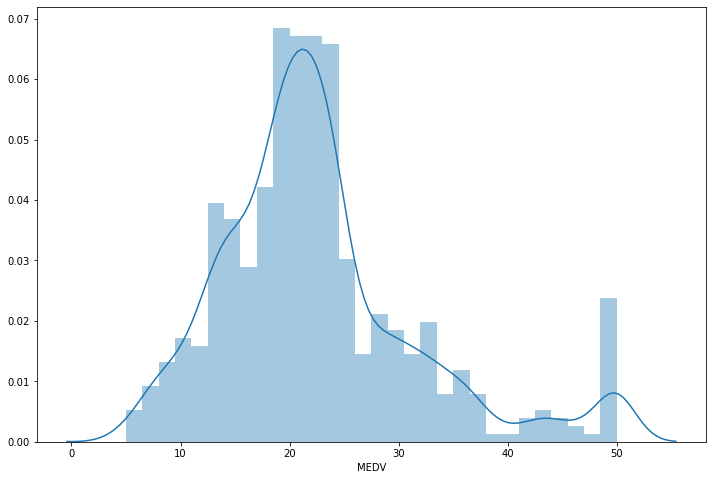

In [6]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df['MEDV'], bins=30)

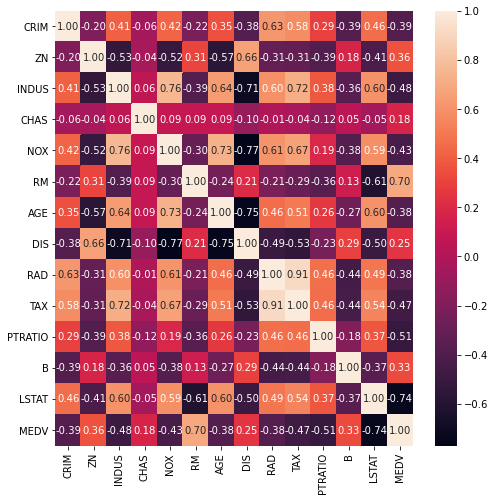

In [7]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')

<Figure size 720x360 with 0 Axes>

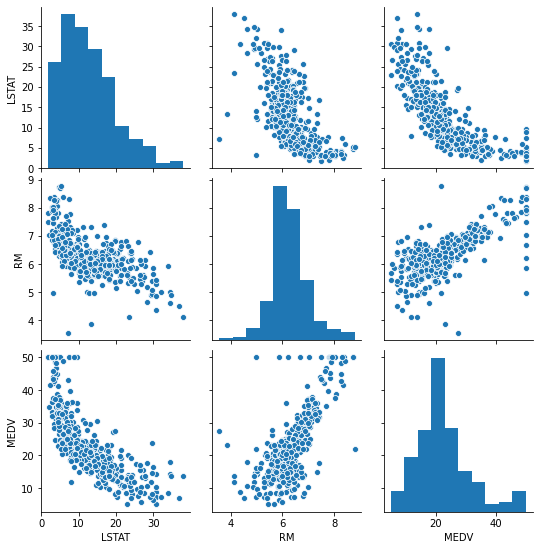

In [8]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

fig = plt.figure(figsize=(10,5))
# sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])
sns.pairplot(data=df[['LSTAT', 'RM', 'MEDV']])

In [9]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
print("Train dataset size X:", X_train.shape,"y:",y_train.shape)
print("Test dataset size X:", X_test.shape,"y:",y_test.shape)

Train dataset size X: (404, 2) y: (404,)
Test dataset size X: (102, 2) y: (102,)


In [11]:
#model building
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test).round()

Text(0.5, 1.0, 'Regression Line Tracing')

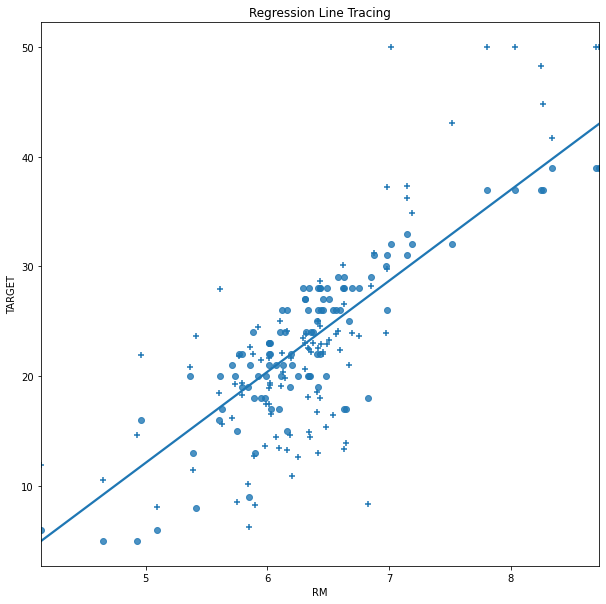

In [12]:
#model visualization
fig = plt.figure(figsize=(10,10))
sns.regplot(x=X_test['RM'], y=y_pred, ci=None)
plt.scatter(x=X_test['RM'], y=y_test, marker="+")
plt.ylabel('TARGET')
plt.title('Regression Line Tracing')

In [13]:
#model coefficients
lr.coef_.round(2)

array([ 4.54, -0.66])

In [14]:
#model intercept
lr.intercept_.round(2)

2.49

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Squared Error:",mean_squared_error(y_test, y_pred).round(2))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred).round(2))

Mean Squared Error: 31.75
Mean Absolute Error: 4.47


Text(0, 0.5, 'y_preds')

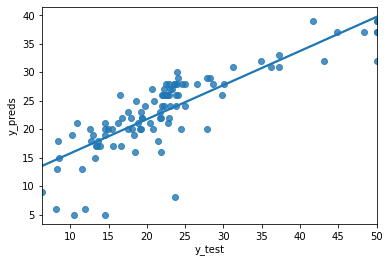

In [16]:
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.xlabel('y_test')
plt.ylabel('y_preds')